## wragling Project: WeRateDogs

I took three step to finally obtained the clean data in the respective order:

1) Gather

2) assess

3) cleaning

In [2]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Gathering

In [3]:
wrd_df = pd.read_csv('twitter-archive-enhanced.csv')
wrd_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

folder = 'image-predictions'
if not os.path.exists(folder):
    os.makedirs(folder)
    
with open(os.path.join(folder, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
os.listdir(folder)

predict_df = pd.read_csv(folder + '/image-predictions.tsv', sep='\t')

In [5]:
predict_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**I am going to hide these keys afetr running this code for privacy reasons if reviewer wants to check this code please change this from markdown to code and put his/her  keys **

In [6]:
api_key = "XXXX"
api_key_secret = "XXXX"
access_token = "XXXX"
access_token_secret = "XXXX"

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

**keys are replaced**

In [7]:
tweet_ids = list(wrd_df.tweet_id)
tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except:
        print("Error for: " + str(tweet))

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 872261713294495745
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 856602993587888130
Error for: 851953902622658560
Error for: 845459076796616705
Error for: 844704788403113984
Error for: 842892208864923648
Error for: 837366284874571778
Error for: 837012587749474308
Error for: 829374341691346946
Error for: 827228250799742977
Error for: 812747805718642688
Error for: 802247111496568832
Error for: 779123168116150273
Error for: 775096608509886464
Error for: 771004394259247104
Error for: 770743923962707968
Error for: 759566828574212096
Rate limit reached. Sleeping for: 742
Error for: 754011816964026368
Error for: 680055455951884288
Rate limit reached. Sleeping for: 743


In [8]:
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)

In [9]:
with open('tweet_json.txt') as file:
    data = json.load(file)
    
tweets = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']# + data[tweet_id]['favourites_count']
    tweets.append({'tweet_id': tweet_id,
                        'retweets_count': retweets,
                        'favorites_count': favorites})
    
tweets_df = pd.DataFrame(tweets, columns = ['tweet_id', 'retweets_count', 'favorites_count'])

In [10]:
tweets_df.head()

,tweet_id,retweets_count,favorites_count
0,892420643555336193,7588,35817
1,892177421306343426,5622,30923
2,891815181378084864,3720,23270
3,891689557279858688,7766,39097
4,891327558926688256,8362,37346


# Assessment
we have in total three data frames now ,tweets_df,wrd_df and pred-df

we are now going to access this data to find the problems in it


Taking one dataframe at a time

In [11]:
wrd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
wrd_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
279,839990271299457024,NaN,NaN,2017-03-10 00:04:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sojourner. His nose is a Fibonacci Spiral...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/839990271...,13,10,Sojourner,None,None,None,None
867,761976711479193600,NaN,NaN,2016-08-06 17:26:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shelby. She finds stuff to put on her ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761976711...,12,10,Shelby,None,None,None,None
1051,742534281772302336,NaN,NaN,2016-06-14 01:49:03 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","For anyone who's wondering, this is what happe...",NaN,NaN,NaN,https://vine.co/v/iLTZmtE1FTB,11,10,None,doggo,None,None,None
2122,670403879788544000,NaN,NaN,2015-11-28 00:48:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nigel. He accidentally popped his ball...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670403879...,10,10,Nigel,None,None,None,None
2229,668248472370458624,NaN,NaN,2015-11-22 02:03:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bisquick. He is a Brown Douglass ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668248472...,8,10,Bisquick,None,None,None,None
2081,670822709593571328,NaN,NaN,2015-11-29 04:32:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can't do better than this lol. 10/10 for the o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670822709...,10,10,None,None,None,None,None
406,823719002937630720,NaN,NaN,2017-01-24 02:28:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Balto. He's very conten...,7.840579e+17,4.196984e+09,2016-10-06 15:49:14 +0000,"https://vine.co/v/5gKxeUpuKEr,https://vine.co/...",12,10,Balto,None,None,None,None
1354,703631701117943808,NaN,NaN,2016-02-27 17:24:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. Based on this picture she's at ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703631701...,11,10,Bella,None,None,None,None
1877,675109292475830276,NaN,NaN,2015-12-11 00:26:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",C'mon guys. We've been over this. We only rate...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675109292...,9,10,a,None,None,None,None
1175,720043174954147842,NaN,NaN,2016-04-13 00:17:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Neptune. He's a Snowy Swiss Mountain F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720043174...,11,10,Neptune,None,None,None,None


In [13]:
wrd_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
(wrd_df=='none').count()

tweet_id                      2356
in_reply_to_status_id         2356
in_reply_to_user_id           2356
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id           2356
retweeted_status_user_id      2356
retweeted_status_timestamp    2356
expanded_urls                 2356
rating_numerator              2356
rating_denominator            2356
name                          2356
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
dtype: int64

In [15]:
wrd_df['name'].value_counts().head(6)

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Name: name, dtype: int64

In [16]:
#finding the dulicates in the dataframe
wrd_df.duplicated().sum()

0

In [17]:
wrd_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

**# wrd_df**

**@ tideness Issue**

1) all coumns are not required

2) none values have to be converted to nan values

3) doogo, floofer,pupper,puppo can be combined in to a single column

**@ Quality Isuee**

1) if we look at the **rating_numerator** and **rating_denominator** columns , the maximum and minimum are out of range

2) drop the rows with denominator  less than 10 rating

3) drop the rows with 0 denominator and numerator

4) drop the rows with numerator and denominator greater than 20

5) tweet_id is integer type

6) names like 'a', 'an', 'the', 'just', 'one', 'very', 'quite', 'not', 'actually', 
             'mad', 'space', 'infuriating', 'all', 'officially', '0', 'old', 'life',
             'unacceptable', 'my', 'incredibly', 'by', 'his', 'such'should be manually changed

7) columns like ,'in_reply_to_user_id','in_reply_to_status_id','retweeted_status_id','retweeted_status_user_id','expanded_urls','doggo','floofer','pupper','puppo' should be dropped

8) combining the dogs class in to one column
9) dog class like flooffer,pupper,doggo puppo

In [18]:
predict_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
predict_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
all_columns = pd.Series(list(tweets_df) + list(wrd_df) + list(predict_df))
all_columns[all_columns.duplicated()]

3     tweet_id
20    tweet_id
dtype: object

In [22]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id           2331 non-null object
retweets_count     2331 non-null int64
favorites_count    2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [23]:
tweets_df.describe()

,retweets_count,favorites_count
count,2331.000000,2331.000000
mean,2665.930073,7480.139854
std,4508.493764,11615.184394
min,1.000000,0.000000
25%,540.500000,1301.500000
50%,1246.000000,3250.000000
75%,3099.000000,9160.500000
max,76634.000000,154393.000000


In [24]:
tweets_df.dtypes

tweet_id           object
retweets_count      int64
favorites_count     int64
dtype: object

In [25]:
wrd_df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [26]:
predict_df.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

**# wrd_df**

**@ tideness Issue**

1) all coumns are not required

2) none values have to be converted to nan values

3) doogo, floofer,pupper,puppo can be combined in to a single column

**@ Quality Isuee**

1) if we look at the **rating_numerator** and **rating_denominator** columns , the maximum and minimum are out of range

2) drop the rows with denominator  less than 10 rating

3) drop the rows with 0 denominator and numerator

4) drop the rows with numerator and denominator greater than 20

5) tweet_id is integer type

6) names like 'a', 'an', 'the', 'just', 'one', 'very', 'quite', 'not', 'actually', 
             'mad', 'space', 'infuriating', 'all', 'officially', '0', 'old', 'life',
             'unacceptable', 'my', 'incredibly', 'by', 'his', 'such'should be manually changed

7) columns like ,'in_reply_to_user_id','in_reply_to_status_id','retweeted_status_id','retweeted_status_user_id','expanded_urls','doggo','floofer','pupper','puppo' should be dropped

8) combining the dogs class in to one column

9) Egyptian Cat is not a dog and should be removed

# Cleaning of the data

In [27]:
wrd_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [28]:
wrd_df.shape

(2356, 17)

In [29]:
wrd_df=wrd_df.query('rating_denominator != "0"')

In [30]:
wrd_df=wrd_df[wrd_df['rating_denominator']> 9 ]
wrd_df=wrd_df[wrd_df['rating_denominator']< 20 ]
wrd_df=wrd_df[wrd_df['rating_numerator'] <=20 ]

In [31]:
wrd_df.shape

(2329, 17)

In [32]:
wrd_df =  wrd_df.replace('None', np.nan)

In [33]:
wrd_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2257
in_reply_to_user_id           2257
timestamp                        0
source                           0
text                             0
retweeted_status_id           2149
retweeted_status_user_id      2149
retweeted_status_timestamp    2149
expanded_urls                   54
rating_numerator                 0
rating_denominator               0
name                           727
doggo                         2232
floofer                       2319
pupper                        2073
puppo                         2299
dtype: int64

In [34]:
wrd_df.loc[wrd_df['doggo'] == 'doggo', 'dog_class'] = 'doggo'
wrd_df.loc[wrd_df['floofer'] == 'floofer', 'dog_class'] = 'floofer'
wrd_df.loc[wrd_df['pupper'] == 'pupper', 'dog_class'] = 'pupper'
wrd_df.loc[wrd_df['puppo'] == 'puppo', 'dog_class'] = 'puppo'

In [35]:
wrd_df['dog_class'].sample(10)

249     pupper
160        NaN
1507       NaN
614        NaN
124        NaN
1648       NaN
94       puppo
2103       NaN
134        NaN
1404       NaN
Name: dog_class, dtype: object

In [36]:
wrd_df.drop(columns=['in_reply_to_user_id','in_reply_to_status_id','retweeted_status_id','retweeted_status_user_id','expanded_urls','doggo','floofer','pupper','puppo'],inplace=True)

In [37]:
wrd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id                      2329 non-null int64
timestamp                     2329 non-null object
source                        2329 non-null object
text                          2329 non-null object
retweeted_status_timestamp    180 non-null object
rating_numerator              2329 non-null int64
rating_denominator            2329 non-null int64
name                          1602 non-null object
dog_class                     379 non-null object
dtypes: int64(3), object(6)
memory usage: 182.0+ KB


In [38]:
tweets_df.isnull().sum()

tweet_id           0
retweets_count     0
favorites_count    0
dtype: int64

In [39]:
predict_df.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
567,678341075375947776,https://pbs.twimg.com/media/CWnznDTU4AAa-6P.jpg,1,golden_retriever,0.853284,True,cocker_spaniel,0.026230,True,Labrador_retriever,0.024123,True
1931,859074603037188101,https://pbs.twimg.com/media/C-wLyufW0AA546I.jpg,1,revolver,0.190292,False,projectile,0.149064,False,fountain,0.066047,False
335,672205392827572224,https://pbs.twimg.com/media/CVQnPMrVAAAzShR.jpg,1,carton,0.952613,False,crate,0.035376,False,pug,0.003267,True


In [40]:
non_names = ['a', 'an', 'the', 'just', 'one', 'very', 'quite', 'not', 'actually', 
             'mad', 'space', 'infuriating', 'all', 'officially', '0', 'old', 'life',
             'unacceptable', 'my', 'incredibly', 'by', 'his', 'such']

for name in wrd_df.name:
    if name in non_names:
        wrd_df.name[wrd_df.name == name] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [41]:
wrd_df['name'].value_counts().head()

None       103
Charlie     12
Cooper      11
Oliver      11
Lucy        11
Name: name, dtype: int64

In [42]:
# merging the data together

wrd_df_clean = pd.merge(wrd_df,predict_df, how='outer', on=['tweet_id'])
wrd_df_clean['tweet_id']=wrd_df_clean['tweet_id'].astype(str)

In [43]:
wrd_final = pd.merge(wrd_df_clean,tweets_df, how = 'outer', on=['tweet_id'])


In [44]:
wrd_final.shape

(2356, 22)

In [45]:
wrd_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id                      2356 non-null object
timestamp                     2329 non-null object
source                        2329 non-null object
text                          2329 non-null object
retweeted_status_timestamp    180 non-null object
rating_numerator              2329 non-null float64
rating_denominator            2329 non-null float64
name                          1602 non-null object
dog_class                     379 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2075 non-null object
p1_conf                       2075 non-null float64
p1_dog                        2075 non-null object
p2                            2075 non-null object
p2_conf                       2075 non-null float64
p2_dog                        2075 non-null object
p3                     

In [46]:
df=wrd_final[wrd_final['p1']=='Egyptian_cat']
df

,tweet_id,timestamp,source,text,retweeted_status_timestamp,rating_numerator,rating_denominator,name,dog_class,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets_count,favorites_count
1319,705223444686888960,2016-03-03 02:49:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bode. He's a heavy sleeper. 9/10 https...,NaN,9.0,10.0,Bode,NaN,https://pbs.twimg.com/media/Ccl0-HVVAAAf8aK.jpg,...,0.090508,False,Chesapeake_Bay_retriever,0.077373,True,Mexican_hairless,0.049472,True,785.0,2546.0


In [47]:
wrd_final.head()

,tweet_id,timestamp,source,text,retweeted_status_timestamp,rating_numerator,rating_denominator,name,dog_class,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets_count,favorites_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7588.0,35817.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5622.0,30923.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3720.0,23270.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7766.0,39097.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8362.0,37346.0


## Analysis

Text(0,0.5,'no of favorite counts')

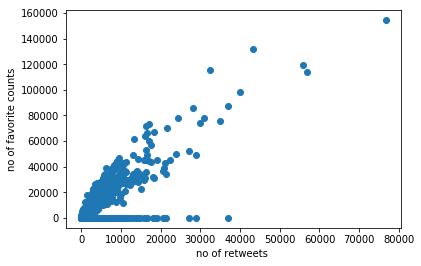

In [48]:
plt.scatter(wrd_final['retweets_count'],wrd_final['favorites_count'])
plt.xlabel('no of retweets ')
plt.ylabel('no of favorite counts')

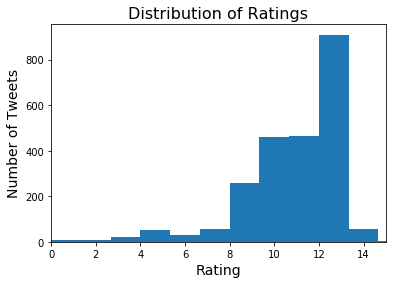

In [49]:

wrd_final['rating_numerator'].plot(kind = 'hist', bins = 15)

plt.xlim(0, 15)
plt.ylabel('Number of Tweets', fontsize = 14)
plt.xlabel('Rating', fontsize = 14)
plt.title('Distribution of Ratings', fontsize = 16)
plt.show();

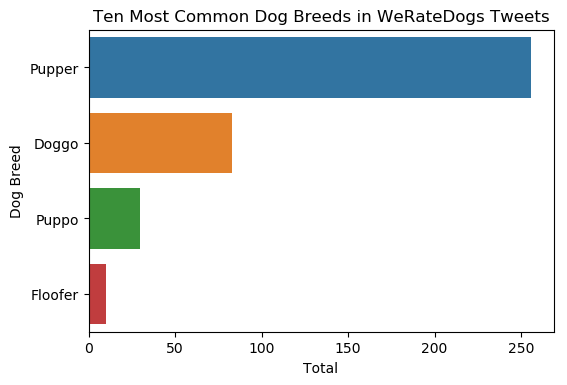

In [54]:
# Plot counts of the 10 most common dog breeds
top_breeds = (wrd_final.dog_class.value_counts()
              .head(10)
              .to_frame()
              .reset_index()
              .rename(columns={'index': 'dog_class', 'dog_class': 'total'}))
top_breeds['dog_class'] = top_breeds['dog_class'].str.title()
plt.figure(dpi=100);
ax = sns.barplot(x='total', y='dog_class', data=top_breeds);
ax.set_title('Ten Most Common Dog Breeds in WeRateDogs Tweets');
ax.set_ylabel('Dog Breed');
ax.set_xlabel('Total');

While these numerators and denominators have strange values, the reason for that is for humor. These are intentional, not errors. I will leave them as they are.

# Store

In [55]:
wrd_final.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)